___

# PROJETO 3

### Lucas Chen Alba
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\Projeto 3


## Estudo da Distribuição da Média Amostral  $\bar{X}$  via SIMULAÇÃO

# 1

Média real da população: 1.00132720191

Variância dos dados 1.00455786633


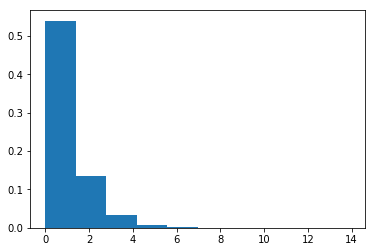

In [2]:
expo = stats.expon.rvs(size = 1000000)
plt.hist(expo, normed = 1)
print ('Média real da população:', expo.mean())
print ()
print ('Variância dos dados', expo.var())

# 2

In [144]:

def tlc (n):
    listamedias = []
    x3 = []
    x15 = []

    for j in range (0,10000):
        amostra = []
        for i in range(n):
            amostra.append(np.random.choice(expo))
    
        listamedias.append(np.mean(amostra))
        
        if len(amostra) > 20:
            x3.append(amostra[2])
            x15.append(amostra[14])

            
    plt.hist(listamedias, color = "Navy", alpha = 0.5, normed = 1, label = 'Médias amostrais', bins = 20)
    plt.legend(loc = 'best')

            

    print ('Amostras de tamanho:', n)
    print ('Média das médias das amostras:', np.mean(listamedias))
    print ('Variância das médias:', np.var(listamedias))

    
    if len(amostra) > 49:

        fig, axs = plt.subplots(figsize=(8, 5))
        plt.title('Histogramas dos valores das médias')
        plt.xlabel("Valores")
        plt.ylabel("Densidade")
        
        plt.hist(x3, color = "IndianRed", alpha = 0.5, normed = 1, label = 'Terceiros valores', bins = 20)
        plt.hist(x15, color = "Lime", alpha = 0.5, normed = 1, label = 'Décimos quinto valores', bins = 20)
        plt.legend(loc = 'best')

        cov = 0
        for i in range (len(x3)):
            cov += (x3[i] - np.mean(x3)) * (x15[i] - np.mean(x15)) / (len(x3))
        print ('Correlação entre os valores de X3 e X15 (amostras aletórias retiradas de X):', cov/(np.std(x3)*np.std(x15)))


    
    


Amostras de tamanho: 2
Média das médias das amostras: 0.993007953386
Variância das médias: 0.501000369052


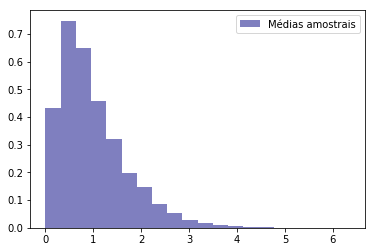

In [145]:
tlc(2)

Amostras de tamanho: 4
Média das médias das amostras: 1.00121025187
Variância das médias: 0.246588136053


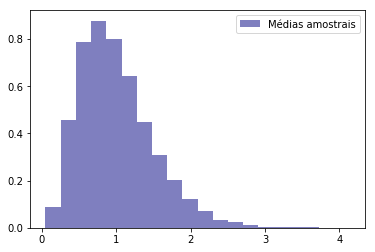

In [146]:
tlc (4)

Amostras de tamanho: 20
Média das médias das amostras: 0.999528578225
Variância das médias: 0.0502560299269


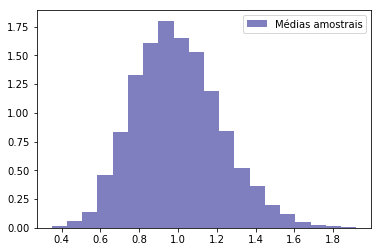

In [147]:
tlc (20)

Amostras de tamanho: 50
Média das médias das amostras: 1.0005300666
Variância das médias: 0.0200343068459
Correlação entre os valores de X3 e X15 (amostras aletórias retiradas de X): -0.0131616895144


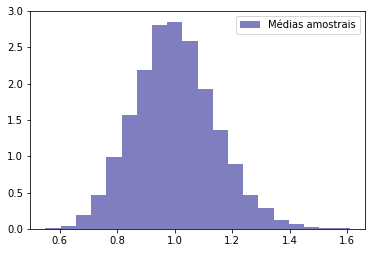

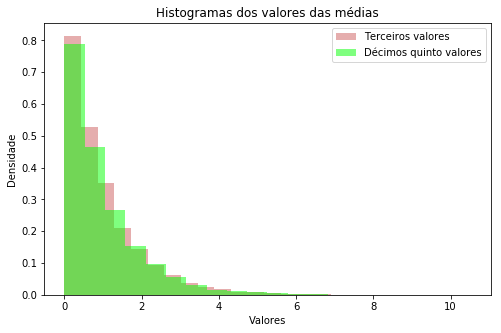

In [148]:
tlc (50)

### Analisando os histogramas das médias coletadas a partir da população expo (lista com 1 milhão de valores que seguem uma distribuição exponencial), percebemos que eles vão se aproximando cada vez mais de uma normal. Estes histogramas foram plotados a partir de dados de uma lista, a qual contém valores das médias de pequenas amostras da nossa população. Ao aumentarmos o número de amostras coletadas para o cálculo da média, os valores tendem a formar uma normal, cuja variância vai tendendo a 0 quando tendemos o número de amostras ao infinito, assim teoricamente chegamos no valor da média da população. Isso deve se ao fato de que quando analisamos as médias dos valores extraídos da população, ele irá nos retornar uma distribuição de probabilidade da média da população.Chegamos em uma probabilidade alta da média ser a real média quando n (número de elementos dos quais será extraída a média) tende ao infinito, pois essa amostra terá tantos valores que terá praticamente os mesmos valores da população em si, nos retornando uma distribuição com praticamente 100% de certeza da média da população real.

### A distribuição de X3 e X15 parecem se aproximar bastante da distribuição de X. O que parece razoável, uma vez que X3 e X15 foram construídas aleatoriamente a partir das amostras (também aleatórias) de X.

### A baixa correlação entre as amostras aleatórias X3 e X15 indica uma independência entre elas. O que parece correto, uma vez que são amostras aleatórias.

___
## Estudo da Distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ via SIMULAÇÃO

Média real da população: 9.99786233941

Variância dos dados 4.00479611339


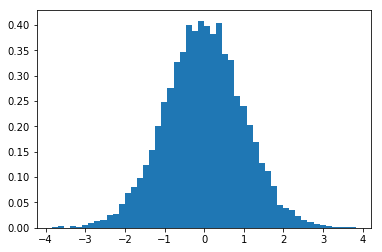

In [149]:
normal = sorted(stats.norm.rvs(loc = 0,  scale = 1, size = 10000))

plt.hist(normal, normed = 1, bins = 50)
print ('Média real da população:', np.mean(norm))
print ()
print ('Variância dos dados', np.var(norm))

In [175]:
def tlc2 (n):
    listamedias = []
    listaz = []
    listat = []

    for j in range (0,1000):
        amostra = []
        for i in range(n):
            amostra.append(np.random.choice(normal))
        listamedias.append(np.mean(amostra))

        
        z = ((np.mean(amostra) - np.mean(normal))/(np.std(normal)/(n)**0.5))
        t = ((np.mean(amostra) - np.mean(normal))/(np.std(amostra)/(n)**0.5))
        listaz.append (z)
        listat.append (t)
        



            
    plt.hist(listamedias, color = "Navy", alpha = 0.5, normed = 1, label = 'Médias amostrais', bins = 30)
    plt.legend(loc = 'best')

            

    print ('Amostras de tamanho:', n)
    print ('Média das médias das amostras:', np.mean(listamedias))
    print ('Variância das médias:', np.var(listamedias))

    
    
    x = np.linspace(-4, 4, 100)

    
    
    plt.subplots(1)
    plt.hist(listaz, color = "IndianRed", alpha = 0.5, normed = 1, label = 'z', bins = 30)
    plt.plot(x, stats.norm.pdf(x, loc = 0, scale = 1), lw = 3, alpha = 0.6, color = 'Black')
    plt.title('Histogramas dos valores de z')
    plt.xlabel("Valores")
    plt.ylabel("Densidade")
    plt.legend(loc = 'best')

    #plt.plot(stats.norm.pdf(x), lw = 3, alpha = 0.6, color = 'Black')


    #plt.plot(norm, stats.norm.pdf(norm, loc = 0, scale = 1), lw = 3, alpha = 0.6, color = 'Black')
    
    #tstud = sorted(stats.norm.rvs(size = 10000, loc = 0, scale = 1))

    
    plt.subplots(1)
    plt.hist(listat, color = "IndianRed", alpha = 0.5, normed = 1, label = 't', bins = 150)
    plt.plot(x, stats.t.pdf(x,df=3), lw=3, color='Black')
    
    plt.title('Histogramas dos valores de t')
    plt.xlabel("Valores")
    plt.ylabel("Densidade")
    plt.xlim(-6,6)

    #plt.plot(tstud, stats.norm.pdf(tstud, loc = 0, scale = 1), lw = 3, alpha = 0.6, color = 'Black')
    


Amostras de tamanho: 4
Média das médias das amostras: 0.00221426812561
Variância das médias: 0.249620410682


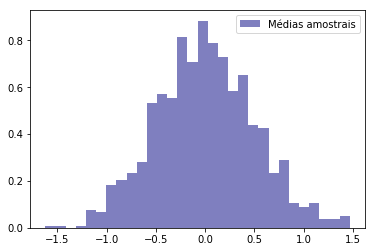

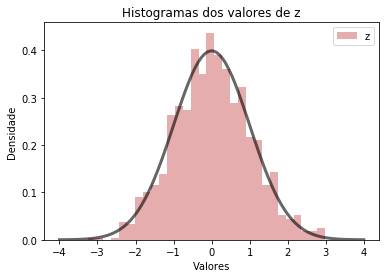

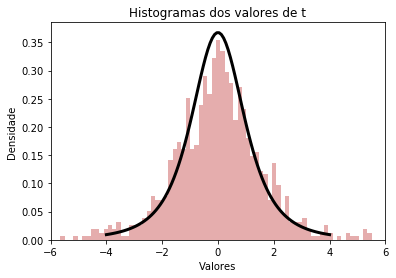

In [176]:
tlc2 (4)

Amostras de tamanho: 20
Média das médias das amostras: -0.00692133484346
Variância das médias: 0.0481124571415


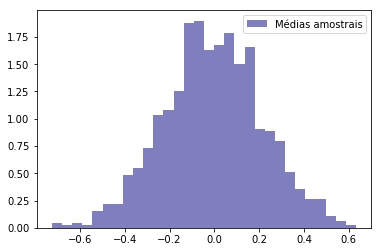

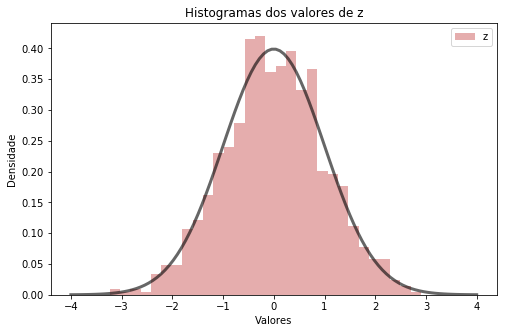

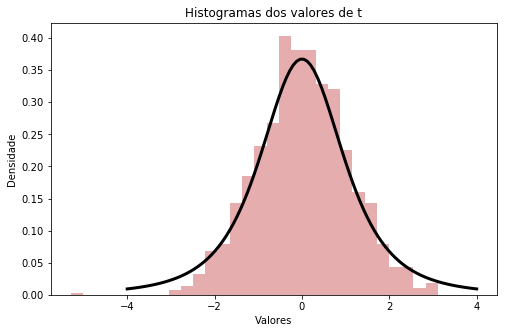

In [159]:
tlc2(20)

Amostras de tamanho: 50
Média das médias das amostras: -0.0168710994743
Variância das médias: 0.0195350090853


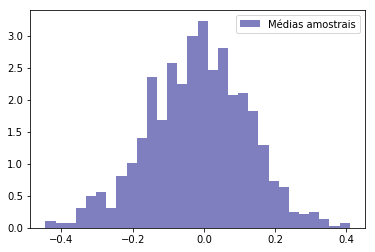

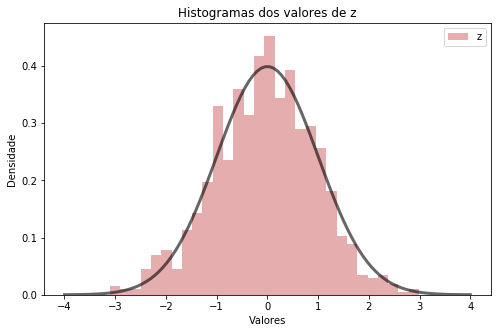

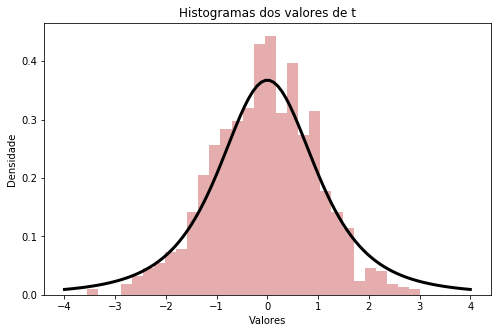

In [160]:
tlc2(50)

Amostras de tamanho: 300
Média das médias das amostras: -0.00977364814925
Variância das médias: 0.00314723438539


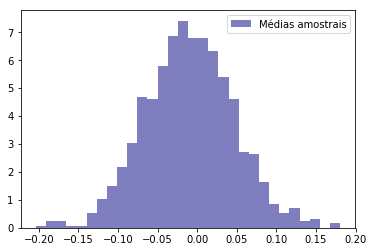

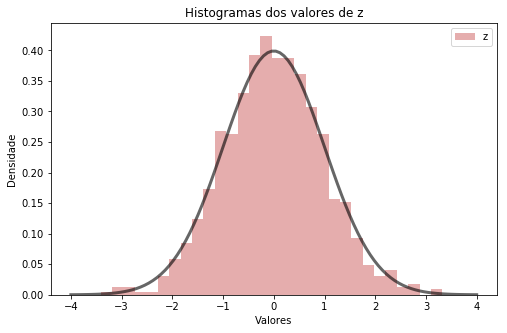

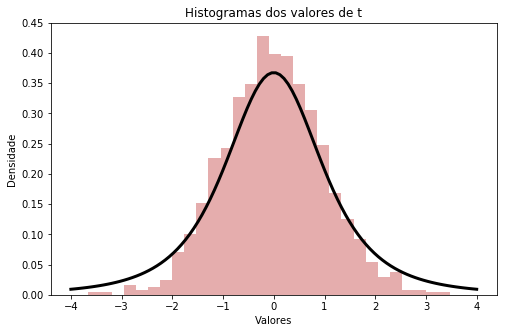

In [161]:
tlc2(300)

### Nestes últimos gráficos foram calculadas as padronizações das médias amostrais de uma distribuição normal em dois casos, utilizando o desvio padrão da população e utilizando os desvios padrões calculados a partir das amostras de tamanho n. Quando padronizamos uma distribuição, quer dizer que estamos criando uma outra distribuição com os valores das probabilidades acumuladas (z) dessa distribuição. A distribuição das médias amostrais utilizando o desvio padrão da população se aproxima mais de uma normal, justamente porque utilizamos o desvio padrão real, já se utilizamos o desvio padrão das amostras, ela não se aproxima tanto de uma normal, no caso, se aproxima mais de uma t-student. Isso ocorre pois quanto maior a amostra, mais o desvio padrão calculado sobre as amostras se aproxima do desvio padrão real.